## Lets Import necessary libraries 

In [2]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

## Import the file

In [3]:
df=pd.read_csv('fatal-police-shootings-data.csv')

# Transforming will help Altire library to work with the data above 5000 records

In [4]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Checking the armed column to distinguish the deadly objects

In [5]:
df['armed_with'].value_counts()

gun                          5099
knife                        1476
unarmed                       517
undetermined                  349
vehicle                       310
replica                       288
blunt_object                  216
unknown                       138
other                          88
gun;vehicle                    38
gun;knife                      35
vehicle;gun                    15
other;gun                       4
knife;vehicle                   3
blunt_object;knife              2
blunt_object;blunt_object       2
knife;blunt_object              2
replica;vehicle                 1
vehicle;knife;other             1
replica;knife                   1
other;blunt_object;knife        1
Name: armed_with, dtype: int64

## Creating new DF to perform operation on armed column

In [6]:
df_copy=df.copy()

## Converting armed column into binary column

##### Converting the objects which can be termed as weapon into 0 and rest of the other as 1

In [7]:
df_copy['armed_with'].replace({'gun':0,'knife':0,'vehicle':0,'blunt_object':0,'gun;vehicle':0,'gun;knife':0,'vehicle;gun':0,'other;gun':0,'knife;vehicle':0,'blunt_object;knife':0,'blunt_object;blunt_object':0,'knife;blunt_object':0,'vehicle;knife;other':0,'replica;knife':0,'other;blunt_object;knife':0},inplace=True)

In [8]:
df_copy['armed_with'].replace({'unarmed':1,'undetermined':1,'replica':1,'unknown':1,'other':1,'replica;vehicle':1},inplace=True)

In [9]:
df_copy

id        date threat_type flee_status  armed_with           city  \
0        3  2015-01-02       point         not         0.0        Shelton   
1        4  2015-01-02       point         not         0.0          Aloha   
2        5  2015-01-03        move         not         1.0        Wichita   
3        8  2015-01-04       point         not         1.0  San Francisco   
4        9  2015-01-04       point         not         1.0          Evans   
...    ...         ...         ...         ...         ...            ...   
8791  9542  2023-10-22       shoot         NaN         0.0         Vinton   
8792  9543  2023-10-22       point         not         0.0         Austin   
8793  9547  2023-10-23       shoot         NaN         0.0     Germantown   
8794  9548  2023-10-23      threat        foot         0.0    San Antonio   
8795  9549  2023-10-23      threat         car         1.0            NaN   

             county state   latitude   longitude location_precision  \
0             Mason    WA  47.246826 -123.121592      not_available   
1        Washington    OR  45.487421 -122.891696      not_available   
2          Sedgwick    KS  37.694766  -97.280554      not_available   
3     San Francisco    CA  37.762910 -122.422001      not_available   
4              Weld    CO  40.383937 -104.692261      not_available   
...             ...   ...        ...         ...                ...   
8791         Gallia    OH        NaN         NaN                NaN   
8792         Travis    TX  30.369880  -97.717010              block   
8793     Washington    WI  43.232019  -88.105943            address   
8794          Bexar    TX  29.390816  -98.560240            address   
8795      Lancaster    NE        NaN         NaN                NaN   

                    name   age gender race    race_source  \
0             Tim Elliot  53.0   male    A  not_available   
1       Lewis Lee Lembke  47.0   male    W  not_available   
2     John Paul Quintero  23.0   male    H  not_available   
3        Matthew Hoffman  32.0   male    W  not_available   
4      Michael Rodriguez  39.0   male    H  not_available   
...                  ...   ...    ...  ...            ...   
8791                 NaN   NaN   male  NaN            NaN   
8792                 NaN   NaN   male  NaN            NaN   
8793                 NaN   NaN   male  NaN            NaN   
8794        Ruben Garcia  34.0   male    H  public_record   
8795                 NaN   NaN    NaN  NaN            NaN   

      was_mental_illness_related  body_camera agency_ids  
0                           True        False         73  
1                          False        False         70  
2                          False        False        238  
3                           True        False        196  
4                          False        False        473  
...                          ...          ...        ...  
8791                       False        False      11487  
8792                       False        False        141  
8793                       False        False      11744  
8794                       False         True         44  
8795                       False        False      23757  

[8796 rows x 19 columns]

### Dropping all the 1 values from armed column

In [11]:
df_armed_location=df_copy.copy()
df_armed_location=df_armed_location.drop(df_armed_location[df_copy['armed_with']==1].index)

### After dropping 1 we are left with 7415 rows × 19 columns

# Finding the distribution of armed people on the map using Altire library

In [12]:

from vega_datasets import data
state = alt.topo_feature(data.us_10m.url,feature= 'states')
background=alt.Chart(state).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=1000,
    height=600
)

point = alt.Chart(df_armed_location).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    size=alt.value(20),
    tooltip='race'
)
background + point

alt.LayerChart(...)

### Creating new data frame to work on fleed people when we will distinguish and conclude how many people resist the police

In [16]:
df_flee=df_armed_location.copy()

In [17]:
df_flee['flee_status'].value_counts()

not      4077
car      1196
foot      949
other     279
Name: flee_status, dtype: int64

### Dropping those who tried to escape

In [19]:
values_to_drop=['car','foot','other','NaN']
df_flee=df_flee[~df_flee['flee_status'].isin(values_to_drop)]
df_flee=df_flee.dropna(subset=['flee_status'])

### We have a data set of 4077 rows × 19 columns whcih will be our final dataset

# Above data set is telling that these are the people who did not flee and try to resist with some kind of weapon

# Plotting those people on map 

In [22]:
#this will tell the distribution of people over the map 
state = alt.topo_feature(data.us_10m.url,feature= 'states')
background=alt.Chart(state).mark_geoshape(
    fill='white',
    stroke='black'
).project('albersUsa').properties(
    width=1000,
    height=600
)

point = alt.Chart(df_flee).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    size=alt.value(20),
    tooltip='race'
)
background + point

alt.LayerChart(...)

### Highlighting the area which maximum density of armed people, like smoothgeohistogram

In [27]:
data = pd.DataFrame({
    'latitude': df_flee['latitude'],  
    'longitude': df_flee['longitude']  
})
states = alt.topo_feature("https://vega.github.io/vega-datasets/data/us-10m.json", 'states')
base_map = alt.Chart(states).mark_geoshape(
    fill='yellow',
    stroke='black'
).project('albersUsa').properties(
    width=1000,
    height=600
)
scatter = alt.Chart(data).mark_circle(size=20, opacity=0.02).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color=alt.value('red')
)
overlayed_chart = base_map + scatter
overlayed_chart


alt.LayerChart(...)

# From above representation it is clear that top 3 states are California, Arizona, Colorodo

### Creating a DF of the states which are having high number of criminals

In [29]:
new_data=df_flee[['id','state', 'latitude', 'longitude', 'age', 'gender', 'race']]
ar = []
for index, row in new_data.iterrows():
    if row['state'] == "AZ" or row['state'] == "CA" or row['state'] == "CO":
        ar.append(row)
state_df_AZ = pd.DataFrame(ar, columns=['latitude', 'longitude'])
# 1st data set
state_df_AZ=state_df_AZ.dropna()
#2nd data set
df_age=pd.DataFrame(ar, columns=['age', 'gender', 'race'])

# Applying K-Mean to find the optimal number of cluster 

C:\Users\saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

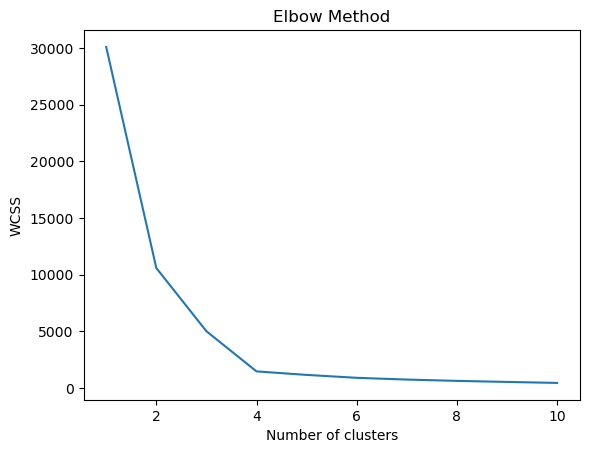

In [30]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", 
                   max_iter= 300, n_init=10)
    kmeans.fit(state_df_AZ)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Applying DBSCAN on latitude and longitude and creating new dataframe with NaN dropped from both latitude and longitude

In [31]:
df_cleaned = state_df_AZ.dropna(subset=['latitude', 'longitude'])
latitude_column = df_cleaned.iloc[:, 0]
longitude_column = df_cleaned.iloc[:, 1]
X = np.column_stack((latitude_column, longitude_column))
db = DBSCAN(eps=1, min_samples=4).fit(X)  
labels = db.labels_
df_result = df_cleaned.copy()
df_result['Cluster'] = labels

# Representing labels on map

In [33]:

state = alt.topo_feature("https://vega.github.io/vega-datasets/data/us-10m.json", feature='states')
background=alt.Chart(state).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=1000,
    height=600
)

point=alt.Chart(df_result).mark_circle().encode(
    longitude='longitude:Q',  # Use 'longitude' from df_result
    latitude='latitude:Q',   # Use 'latitude' from df_result
    color='Cluster:N'
).properties(
    width=1000,
    height=600
)
background + point

alt.LayerChart(...)

### From above spatial data analysis it is clear that Calafornia and Arizona have uniform distribution of criminals all over the state 
### And Colorodo has lot of outliners and maximum density is at center.

# Analysing the age factor in thses 3 states

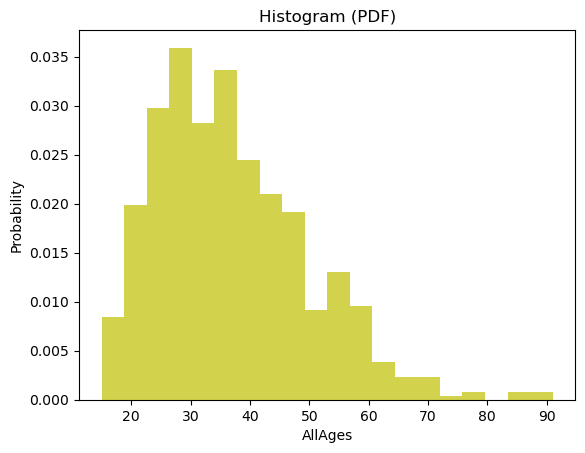

Minimum = 15.0
Maximum = 91.0
Mean = 36.90420899854862
Median = 35.0
Standard Deviation = 12.642885546148092
Skewness = 0.8613391131291938
Kurtosis = 0.8092341121491056


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


df_age = df_age.dropna()
AllAges = df_age['age'].apply(pd.to_numeric, errors='coerce').dropna()


plt.hist(AllAges, bins='auto', density=True, alpha=0.7, color='y')
plt.title('Histogram (PDF)')
plt.xlabel('AllAges')
plt.ylabel('Probability')
plt.show()


minimum = AllAges.min()
maximum = AllAges.max()
mean = AllAges.mean()
median = AllAges.median()
stdev = AllAges.std()
skewness = skew(AllAges)
kurt = kurtosis(AllAges)

print("Minimum =", minimum)
print("Maximum =", maximum)
print("Mean =", mean)
print("Median =", median)
print("Standard Deviation =", stdev)
print("Skewness =", skewness)
print("Kurtosis =", kurt)


##### The mean and median show a slight difference, indicating a slight right skew in the distribution of ages. In fact, the skewness measures around 0.86. It's worth noting that the kurtosis is close to .80 which means that our distribution is slight peaky, suggesting there is no pronounced peak near the mean and no significant presence of heavy tails in the distribution.

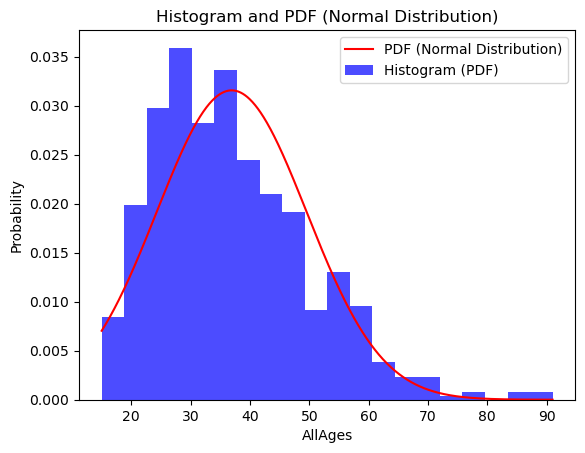

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mean_age = AllAges.mean()
std_age = AllAges.std()
x = np.linspace(AllAges.min(), AllAges.max(), 1000)
pdf = norm.pdf(x, loc=mean_age, scale=std_age)
plt.plot(x, pdf, label='PDF (Normal Distribution)', color='r')
plt.hist(AllAges, bins='auto', density=True, alpha=0.7, color='b', label='Histogram (PDF)')
plt.title('Histogram and PDF (Normal Distribution)')
plt.xlabel('AllAges')
plt.ylabel('Probability')
plt.legend()
plt.show()


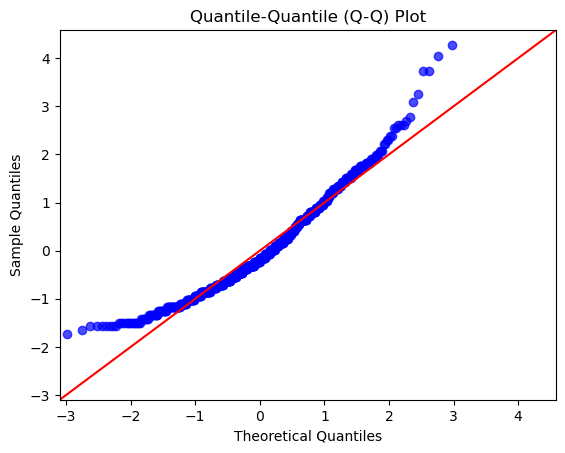

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qq_plot = sm.qqplot(AllAges, line='45', fit=True, markerfacecolor='b', markeredgecolor='b', alpha=0.7)
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [37]:
threshold = mean_age + 2 * stdev
num_points_above_threshold = len(AllAges[AllAges > threshold])
percentage_above_threshold = (num_points_above_threshold / len(AllAges)) * 100
print(f"The value of Mean + 2 * Standard Deviation: {threshold:.4f}")
print(f"The percentage of data points more than 2 standard deviations from the mean: {percentage_above_threshold:.4f}%")

The value of Mean + 2 * Standard Deviation: 62.1900
The percentage of data points more than 2 standard deviations from the mean: 3.1930%


In [38]:
import scipy.stats as stats
percentage_std_normal = (1 - stats.norm.cdf(2)) * 100
print(f"The percentage for values greater than 2 standard deviations from the mean in a standard normal distribution: {percentage_std_normal:.4f}%")

The percentage for values greater than 2 standard deviations from the mean in a standard normal distribution: 2.2750%


In [41]:
lower_threshold_1std = mean_age - stdev
upper_threshold_1std = mean_age + stdev
num_points_within_1_std = len(AllAges[(AllAges >= lower_threshold_1std) & (AllAges <= upper_threshold_1std)])
percentage_within_1_std = (num_points_within_1_std / len(AllAges)) * 100
print(f"The percentage of data points within 1 standard deviation from the mean: {percentage_within_1_std:.4f}%")
percentage_standard_normal_1std = (stats.norm.cdf(1) - stats.norm.cdf(-1)) * 100
print(f"The percentage for a standard normal distribution within 1 standard deviation: {percentage_standard_normal_1std:.4f}%")

The percentage of data points within 1 standard deviation from the mean: 68.2148%
The percentage for a standard normal distribution within 1 standard deviation: 68.2689%


In [42]:
lower_bound = mean_age - std_age
upper_bound = mean_age + std_age
print(f"Lower Bound (mean - standard deviation): {lower_bound:.4f}")
print(f"Upper Bound (mean + standard deviation): {upper_bound:.4f}")

Lower Bound (mean - standard deviation): 24.2613
Upper Bound (mean + standard deviation): 49.5471


# Approximately 2/3 (68%) of all the ages of people from California, Arizona, Colorodo who were violent toward police fall within the range of 24 to 50 age group.